In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [20]:
df = pd.read_csv('../../Datasets/milk.csv', index_col=0)
df.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [7]:
scaler = StandardScaler()
milkscaled=scaler.fit_transform(df)

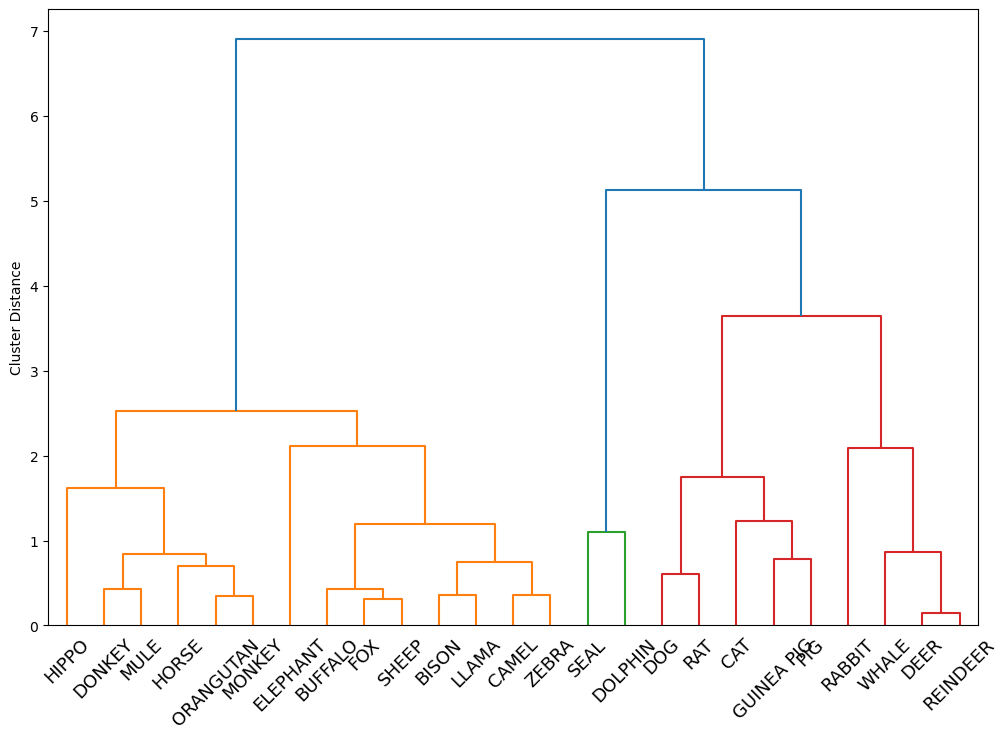

In [8]:
### Calculating the linkages
mergings = linkage(milkscaled,method='complete')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
dendrogram(mergings,
           labels=list(df.index),
           leaf_rotation=45,
           leaf_font_size=13)
plt.ylabel("Cluster Distance")
plt.show()

### Protein Dataset

In [5]:
import pandas as pd
df = pd.read_csv('../../Datasets/Protein.csv', index_col=0)
df.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z1 = linkage(df, method='single', metric='euclidean')
Z2 = linkage(df, method='complete', metric='euclidean')
Z3 = linkage(df, method='average', metric='euclidean')
Z4 = linkage(df, method='ward', metric='euclidean')

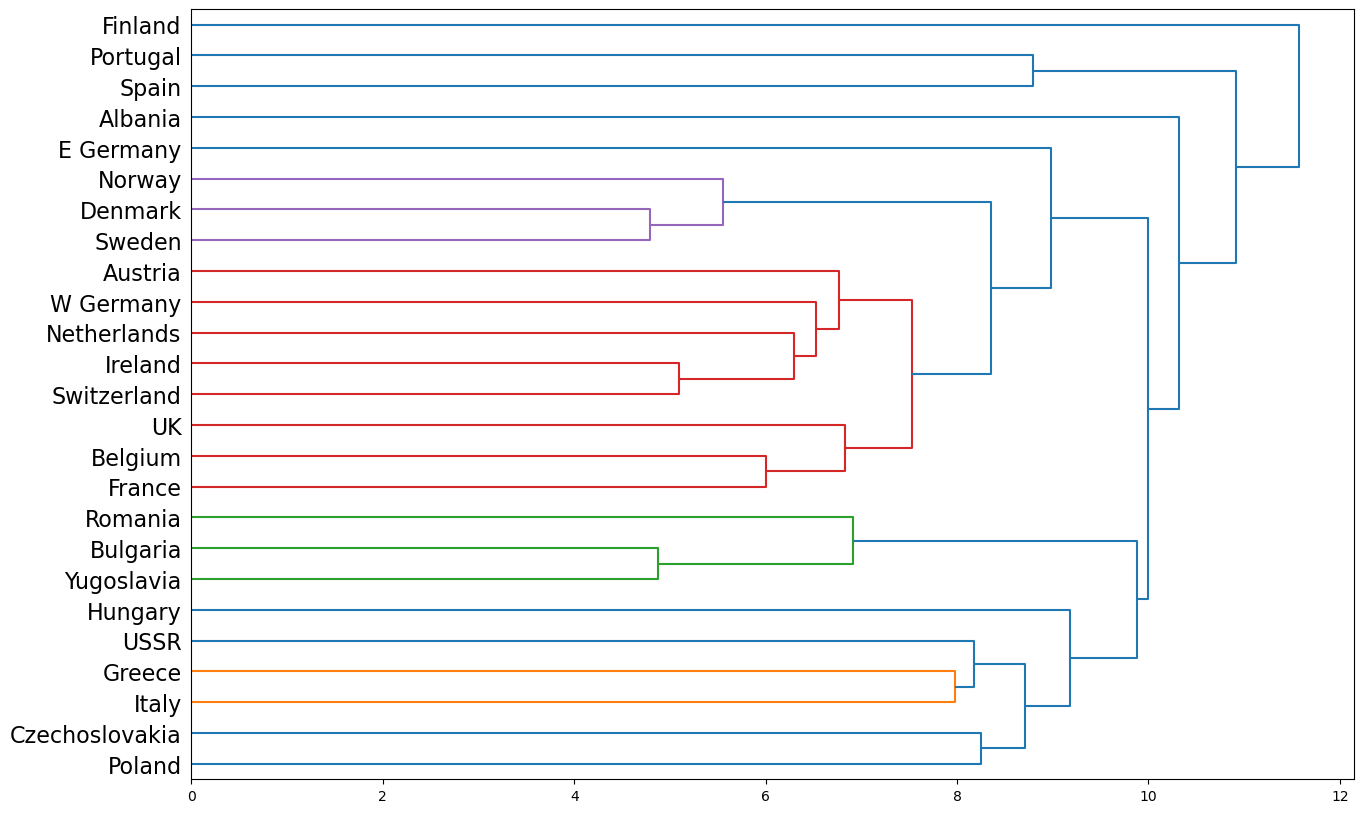

In [17]:
plt.figure(figsize=(15, 10))
dendrogram(Z1, orientation='right', labels=list(df.index), distance_sort='descending',
            show_leaf_counts=False, leaf_font_size=16)
plt.show()

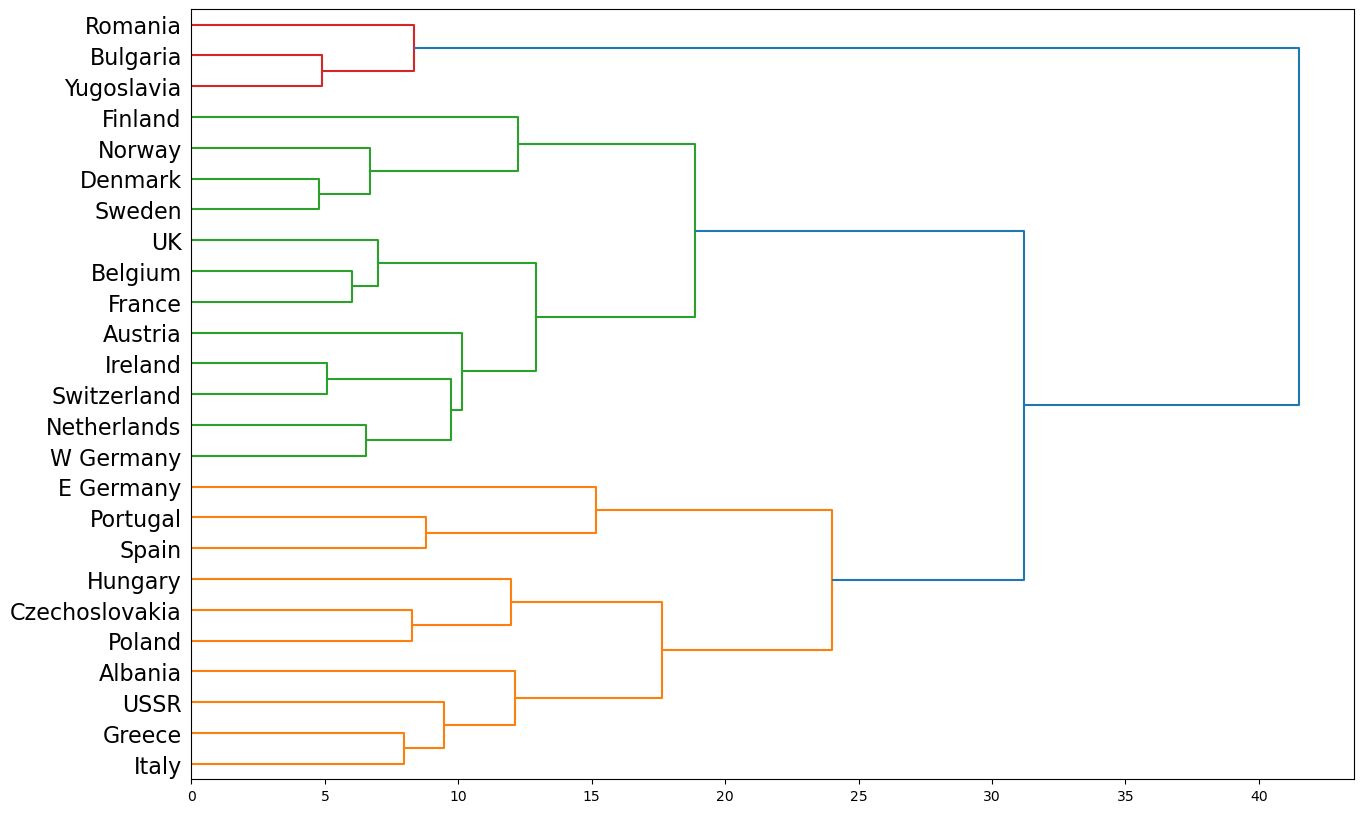

In [16]:
plt.figure(figsize=(15, 10))
dendrogram(Z2, orientation='right', labels=list(df.index), distance_sort='descending',
            show_leaf_counts=False, leaf_font_size=16)
plt.show()

In [18]:
df['Clusters'] = fcluster(Z1, 2, criterion='maxclust')
df.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,Clusters
Country,,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,1
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,1
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,1
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,1
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,1


### Agglomerative Clustering

In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
clustering = AgglomerativeClustering(n_clusters=2,
                                     linkage='average') 
pipe = Pipeline([('SCl', scaler), ('CLUST', clustering)])
milkscaled=scaler.fit_transform(df)
pipe.fit(df)
print(clustering.labels_)
print(silhouette_score(milkscaled,clustering.labels_))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
0.5186847578981009
